# Identificar Fronteras no Lineales

In [1]:
from sklearn.datasets import make_circles, make_blobs
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

import seaborn as sns; sns.set()
from sklearn.svm import SVC

In [2]:
X, Y = make_circles(100, factor = .1, noise= .1)

In [3]:
def plt_svc(model, ax=None, plot_support=True):
    """Plot de la función de decisión para una clasificación en 2D con SVC"""
    if ax is None:
        ax = plt.gca()#Se grea un nuevo dibujo si ax es NONE
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    ## Generamos la parrilla de puntos para evaluar el modelo
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(yy,xx)
    
    xy = np.vstack([X.ravel(), Y.ravel()]).T #generamos tuple
    P = model.decision_function(xy).reshape(X.shape)
    
    ##Representamos las froteras y los márgenes del SVC    
    ax.contour(X,Y,P, colors="k", levels=[-1,0,1], alpha=0.5, linestyles=["--", "-", "--"])
   
    if plot_support:
        ax.scatter(model.support_vectors_[:,0],
                  model.support_vectors_[:,1],
                  s=100, linewidth=1, facecolors="blue")
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

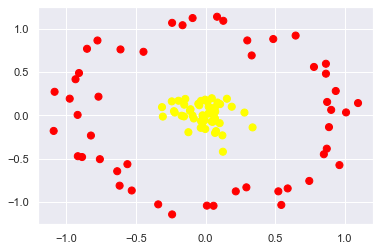

In [4]:
plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap="autumn")

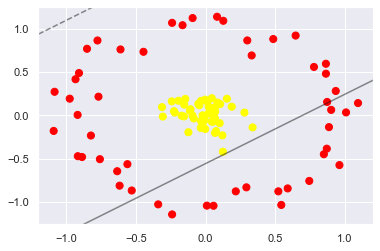

In [5]:
plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap="autumn")
plt_svc(SVC(kernel="linear").fit(X,Y), plot_support=False)

In [6]:
r = np.exp(-(X**2).sum(1))
r

array([0.44017171, 0.29888842, 0.44687463, 0.96798826, 0.94756506,
       0.91866795, 0.9949879 , 0.29512102, 0.99119949, 0.90957344,
       0.98363353, 0.97150722, 0.99737916, 0.93597028, 0.99916096,
       0.99340273, 0.97594713, 0.35409924, 0.9727924 , 0.96156534,
       0.30824238, 0.89850521, 0.3225304 , 0.97172144, 0.25902541,
       0.99925404, 0.98729054, 0.96225004, 0.95464961, 0.9798869 ,
       0.87482822, 0.33221964, 0.36001574, 0.35191284, 0.2806796 ,
       0.4785102 , 0.94467042, 0.99265323, 0.34387399, 0.55575435,
       0.34539963, 0.37132069, 0.98471313, 0.9707681 , 0.26803854,
       0.39915508, 0.93367817, 0.52960703, 0.96013353, 0.3508059 ,
       0.99172048, 0.99133173, 0.28442907, 0.44104109, 0.82438446,
       0.32956236, 0.39631723, 0.40335882, 0.42895656, 0.97592385,
       0.43289028, 0.28596417, 0.2540268 , 0.36057458, 0.94772392,
       0.45842295, 0.98991461, 0.9941793 , 0.9914077 , 0.99688752,
       0.433807  , 0.37571896, 0.36336363, 0.52781311, 0.97788

In [7]:
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets import interact, fixed

Text(0.5, 0, 'r')

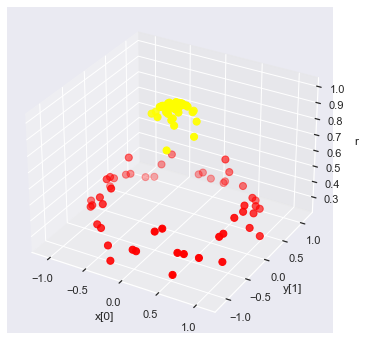

In [8]:
fig = plt.figure(figsize=(16,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1],r, c=Y, s=50, cmap = "autumn")
ax.set_xlabel("x[0]")
ax.set_ylabel("y[1]")
ax.set_zlabel("r")

In [9]:
def plot_3D(elev=30, azim=30, X=X, Y=Y, r=r):
    ax = plt.subplot(projection="3d")
    ax.figsize=(16,6)
    ax.scatter3D(X[:,0], X[:,1], r, c=Y, s =50, cmap = "autumn")
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel("x[0]")
    ax.set_ylabel("y[1]")
    ax.set_zlabel("r")

In [10]:
interact(plot_3D, elev=[-90,-60,-30,0,30,60,90], 
         azim=[-180,-150,-120,-90,-60,-30,0,30,60,90,120,150, 180],
         X=fixed(X), Y=fixed(Y), r=fixed(r) )

interactive(children=(Dropdown(description='elev', index=4, options=(-90, -60, -30, 0, 30, 60, 90), value=30),…

<function __main__.plot_3D(elev=30, azim=30, X=array([[ 2.16943288e-01, -8.79503263e-01],
       [ 1.27135626e-01,  1.09156836e+00],
       [ 8.86929694e-01, -1.37233087e-01],
       [-3.16166358e-03,  1.80347785e-01],
       [-2.27221802e-01,  4.72221406e-02],
       [-2.43055760e-01,  1.60481871e-01],
       [ 6.34244398e-02, -3.16551070e-02],
       [ 1.09567739e+00,  1.40928432e-01],
       [-9.39806443e-02, -2.66403857e-03],
       [-3.07479656e-01, -1.53558117e-02],
       [-1.08130404e-01,  6.93519678e-02],
       [ 8.54319999e-02,  1.46996427e-01],
       [ 4.92157224e-02,  1.42160151e-02],
       [-1.95041840e-01,  1.67720714e-01],
       [-1.83307186e-02, -2.24360147e-02],
       [ 6.93146878e-02,  4.25981953e-02],
       [-1.55426844e-01, -1.37607279e-02],
       [-5.30963083e-01, -8.69629958e-01],
       [ 1.04264064e-01,  1.29281043e-01],
       [ 7.50800678e-02, -1.83182260e-01],
       [-3.40801552e-01, -1.02991415e+00],
       [-3.13343697e-01,  9.40133143e-02],
       

### RBF: Radial Basis Function
Busca forma circularas que separen correctamente los datos distribuidos en forma circular.

In [11]:
rbf = SVC(kernel="rbf", C=1E6)
rbf.fit(X,Y)

SVC(C=1000000.0)

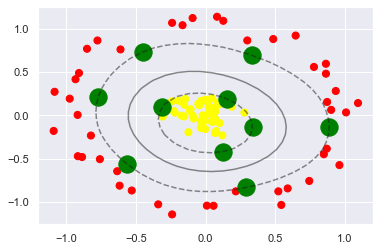

In [12]:
plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap="autumn")
plt_svc(rbf)
plt.scatter(rbf.support_vectors_[:,0], rbf.support_vectors_[:,1], s=300, lw=1, facecolors="green")
#El último scatter imprime los puntitos de los suport vector, ya los hace la función

## Ajustar los parámetros de SVM

In [32]:
X,Y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=1.2)

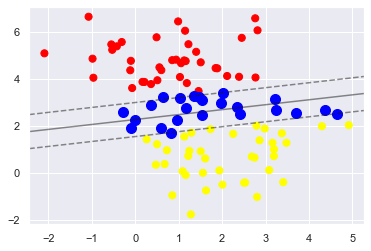

In [44]:
plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap="autumn")
model = SVC(kernel="linear", C=10000)
model.fit(X,Y)
plt_svc(model)

In [15]:
X,Y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=0.8)

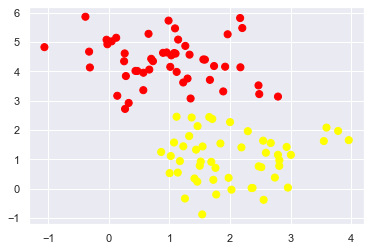

In [16]:
plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap="autumn")

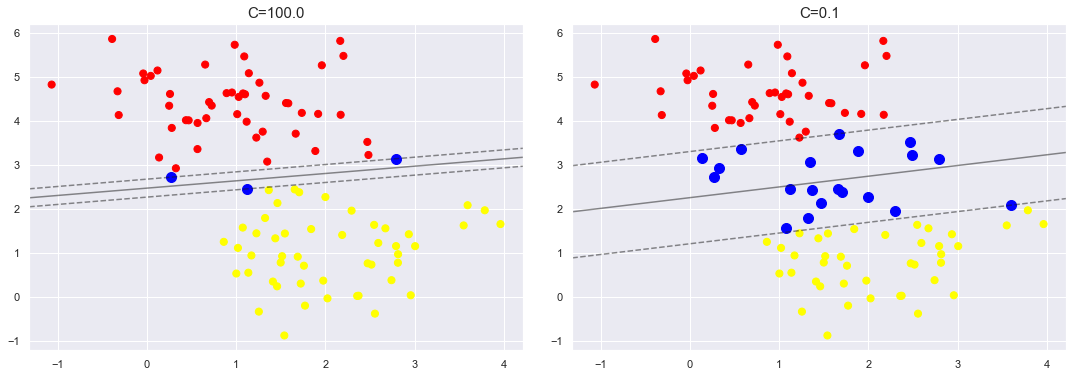

In [31]:
fig, ax = plt.subplots(1,2, figsize=(16,6))
fig.subplots_adjust(left=0.05, right=0.95, wspace=0.1)

for ax_i, C in zip(ax,[100.0, 0.1]):
    model = SVC(kernel="linear", C=C)
    model.fit(X,Y)
    ax_i.scatter(X[:,0],X[:,1], c=Y, s=50, cmap="autumn") #c es para las clases 0 o 1
    plt_svc(model, ax_i)
    ax_i.set_title("C={0:.1f}".format(C), size = 15)

Se observa como para el mismo conjunto de datos, con un  C mucho más grande, tendremos muchos más support vectors, que cuando el C ya vale 10, o sea que es más restrictivo el factor de penalty. Esto puede variar mucho de acuerdo a lo solapada que esté la información.